# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 10
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = (x - a/2)^2 + (y - a/2)^2
Apot(x, y, z) = .2 * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
C = 500.0
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.685691e+01     1.475862e+01
 * time: 0.0014529228210449219
     1     3.495843e+01     8.501801e+00
 * time: 0.005434989929199219
     2     3.302320e+01     1.343596e+01
 * time: 0.04579782485961914
     3     2.346909e+01     3.828782e+00
 * time: 0.05076789855957031
     4     2.135018e+01     3.097588e+00
 * time: 0.05427193641662598
     5     1.981224e+01     1.989324e+00
 * time: 0.05817890167236328
     6     1.968476e+01     3.242790e+00
 * time: 0.06217694282531738
     7     1.915089e+01     1.916617e+00
 * time: 0.06609582901000977
     8     1.864931e+01     1.925864e+00
 * time: 0.06997895240783691
     9     1.827553e+01     1.661297e+00
 * time: 0.07387089729309082
    10     1.791439e+01     1.109399e+00
 * time: 0.0777888298034668
    11     1.774646e+01     6.247654e-01
 * time: 0.08167481422424316
    12     1.771539e+01     9.829832e-01
 * time: 0.08475399017333984
    13     1.769402e+01     8.790938e-01
 * tim

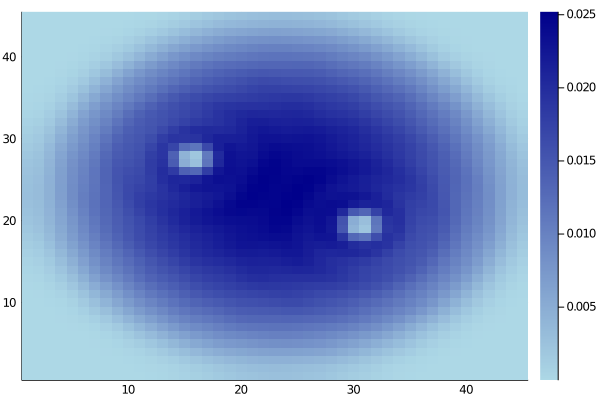

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ.real[:, :, 1], c=:blues)